<a href="https://colab.research.google.com/github/AnujM09/Cardiovascular_Risk_Prediction/blob/main/Cardiovascular_Risk_Prediction_Anuj_Menaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cardiovascular_Risk_Prediction**

## The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

# **Data Description:**

## **Demographic:**
* Sex: Male or Female("M" or "F")
* Age: Age of the patient; (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

## **Behavioral:**
* is_smoking: Whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: The number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

## **Medical (History):**
* BP Meds: Whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: Whether or not the patient was hypertensive (Nominal)
* Diabetes: Whether or not the patient had diabetes (Nominal)

## **Medical (Current):**
* Tot Chol: Total cholesterol level (Continuous)
* Sys BP: Systolic blood pressure (Continuous)
* Dia BP: Diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: Heart rate (Continuous - In medical research, variables such as heart rate though infact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: Glucose level (Continuous)


## **Predict Variable (Desired Target):**
* 
10-year risk of coronary heart disease CHD
(binary: “1”, means “Yes”, “0” means “No”) - DV

# **Data Preparation**

## **Importing & Inspecting Dataset**

In [1]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing Required Libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import missingno as msno # The missingno library aids in understanding how missing values are distributed across data and the correlation between features.

from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from imblearn.combine import SMOTETomek
from collections import Counter

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',None) # To Display all the columns present in the Data Frame

In [3]:
# Reading the csv Data Frame
df = pd.read_csv('/content/drive/MyDrive/Cardiovascular Risk Prediction/data_cardiovascular_risk.csv')

In [4]:
# Checking top 5 records in dataframe
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
# Checking bottom 5 records in dataframe
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [6]:
# Checking shape pf dataframe
df.shape

(3390, 17)

In [7]:
# getting information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [8]:
# Checking the null values present in the Dataset
df.isnull().sum().sort_values(ascending = False)

glucose            304
education           87
BPMeds              44
totChol             38
cigsPerDay          22
BMI                 14
heartRate            1
id                   0
diaBP                0
sysBP                0
prevalentHyp         0
diabetes             0
age                  0
prevalentStroke      0
is_smoking           0
sex                  0
TenYearCHD           0
dtype: int64

Duplicate values occur when two features have the same set of values.

Duplicate values can have a negative impact on our accuracy. Duplicate values can sabotage the split between the train, test, and validation sets, resulting in skewed performance predictions that disappoint the model in production.

Duplicate values are best dealt with by deleting them.

In [9]:
# Checking for the Duplicate values 
df.duplicated().sum()

0

As we can see there are no duplicate values, so we can move ahead.

In [10]:
# Checking The info of Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [11]:
# Checking the Columns for the Distribution of the Data
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [12]:
# Check all the coloumns present in our dataset
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [13]:
# Dropping the id column
df.drop(['id'],inplace = True,axis = 1)

## **Missing Value Treatment**

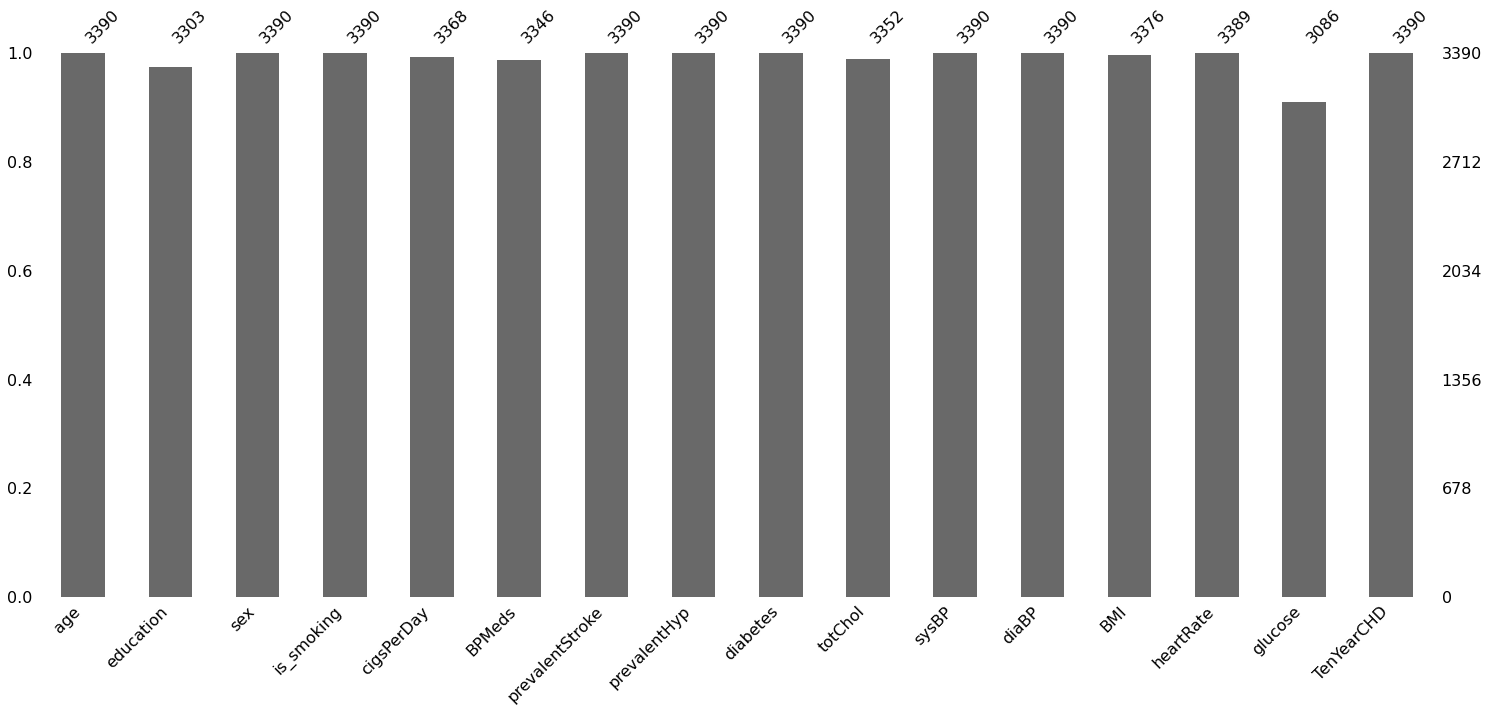

In [14]:
# Plotting graph to get the null values count
fig = msno.bar(df)

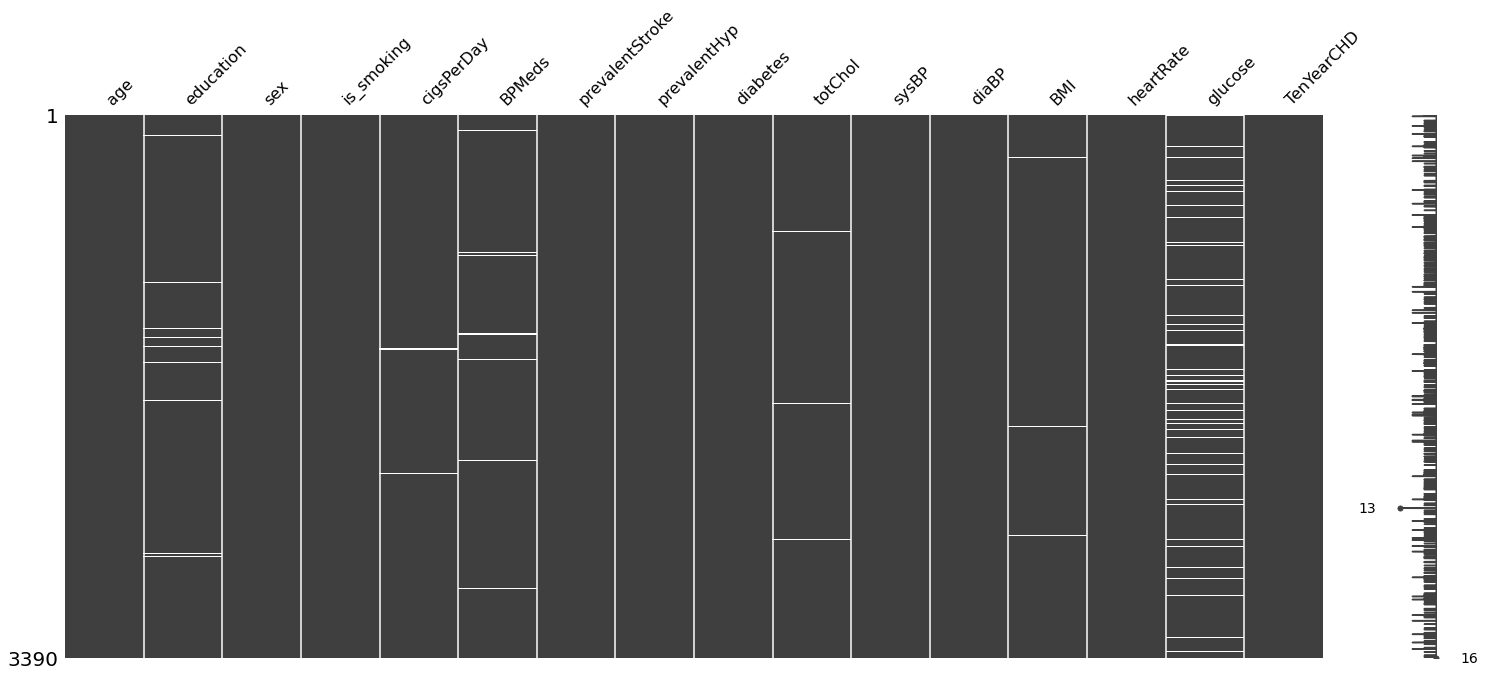

In [15]:
# Getting matrix for missing values
fig1 = msno.matrix(df)

As seen above, The sparkline to the right summarises shape of the data completeness and highlights the rows with the highest and lowest nullity in the dataset.

# **Method for Imputation of Missing Values:**

## KNN imputer :

KNN imputer is a sci-kit-learn class that is used to fill in or predict missing values in a dataset. It is a more useful method that uses the KNN algorithm's basic approach rather than the naive approach of filling all values with the mean or median.

Each missing feature is imputed using values from the feature's n neighbors nearest neighbors. The neighbors' features are averaged uniformly or weighted by their distance from each other.

In [16]:
# Copying the data into new variable so that the original dataset can be viewed if required
df1 = df.copy(deep=True)

**Numerical Features:**

n_neighbor = Replacing missing values with the average of the three nearest neighbors to the missing values.

weights = All datapoints in the dimensional space are given "Uniform" equal importance.

metric = "Nan Euclidean" Distance metric for locating nearest neighbours; the smaller the distance, the closer the observation.

In [17]:
# Creating a variable for the knnnimputer for easier access
knn_imp = KNNImputer(n_neighbors=3, weights="uniform",metric='nan_euclidean')

In [18]:
#imputing missing values in feature heartRate
df1['heartRate'] = knn_imp.fit_transform(df1[['heartRate']])

# imputeing missing values in feature Glucose_level
df1['glucose'] = knn_imp.fit_transform(df1[['glucose']])

# imputeing missing values in feature Tot_chol_Level
df1['totChol'] = knn_imp.fit_transform(df1[['totChol']])

# imputeing missing values in feature BMI
df1['BMI'] = knn_imp.fit_transform(df1[['BMI']])

# imputeing missing values in feature Cig_Per_Day
df1['cigsPerDay'] = knn_imp.fit_transform(df1[['cigsPerDay']])

**Simple Imputer :**

Simple Imputer is a scikit-learn class that helps with missing data in predictive model datasets. It substitutes a placeholder for the Nan values. strategy: The data that will be used to replace the NaN values in the dataset.

In [19]:
# Creating a variable for the simple imputer for easier access
simp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [20]:
# impute missing values in feature Education
df1['education'] = simp.fit_transform(df1[['education']])
# impute missing values in feature BP_Medication
df1['BPMeds'] = simp.fit_transform(df1[['BPMeds']])

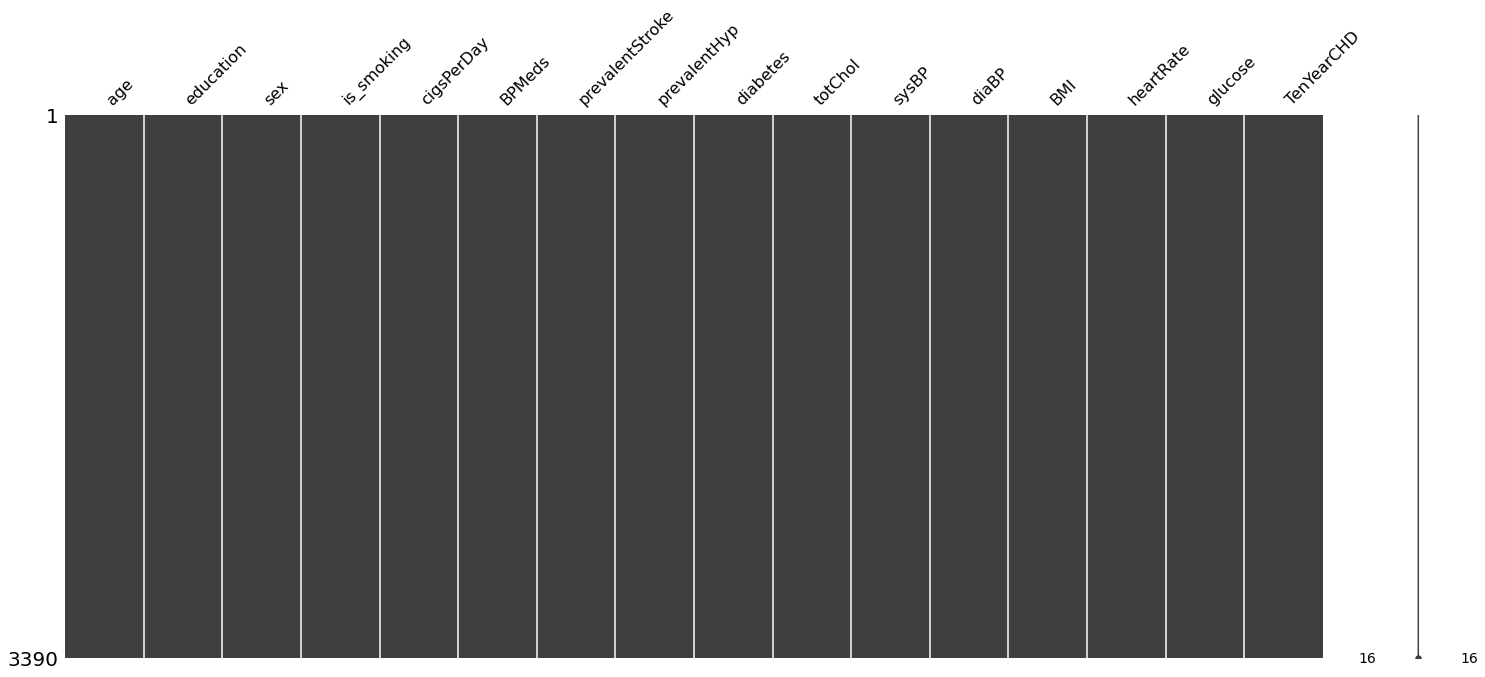

In [21]:
# Plotting matrix to see the available null values
fig4 = msno.matrix(df1)

**Assertion:**

After applying KNN and a simple imputer, we can see that there is no longer any null value present.

In [22]:
# Checking if there is any null Value present after implementing the operations
df1.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# **EXPLORATORY DATA ANALYSIS :**

Exploratory Data Analysis is the crucial process of conducting preliminary investigations on data to uncover patterns, detect anomalies, test hypotheses, and validate assumptions using summary statistics and graphical representations.


It is best to first analyze the data and then strive to get as many insights as possible from it. Before getting their hands dirty with data, EDA is all about making sense of it.

In [23]:
# Let us examine the discrete and continuous characteristics.
# Creating a categorical list where all the column  names of category are present
cat_feat = [i for i in df1.columns if df1[i].nunique()<=4]
# Creating a Numerical list where all the column  names of number are present
num_feat = [i for i in df1.columns if i not in cat_feat]

# Printing the list to see the names
print(cat_feat)
print(num_feat)

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


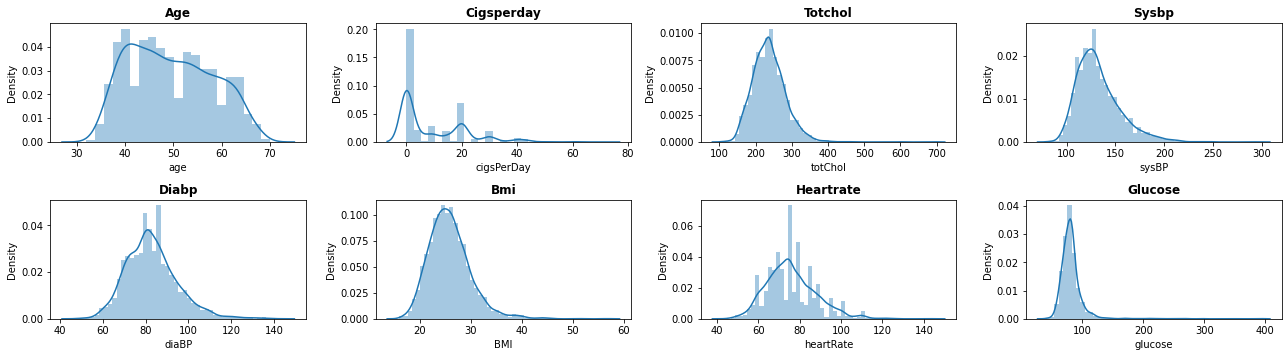

In [24]:
# Plotting a distplot to check the distribution of the data as well as skewness of the data
plt.figure(figsize=(18,12))
for n,column in enumerate(num_feat):
  plt.subplot(5, 4, n+1)
  sns.distplot(df1[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

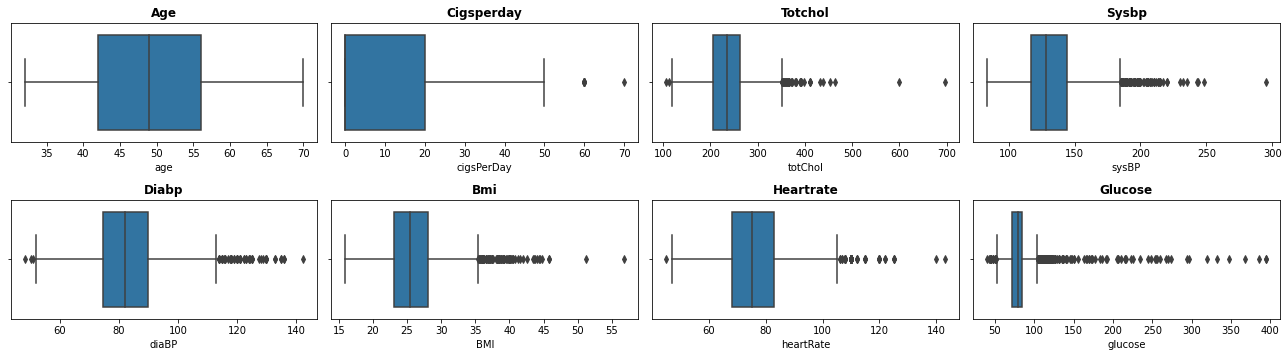

In [25]:
# Creating Boxplot for the columns to see if there are any Outliers present in the data
plt.figure(figsize=(18,12))
for n,column in enumerate(num_feat):
  plt.subplot(5, 4, n+1)
  sns.boxplot(df1[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [26]:
# Copying the dataframe into a new variable so the old dataframe can be viewed
df2 = df1.copy()

## **Handling Outliers :**

Outliers are data points that differ significantly from the rest of the data in the dataset. These can skew the data and reduce the accuracy of the ML model.

In [57]:
# Removing outliers by standard methods and Plotting graphs:
for col in num_feat:
  # Using IQR method to define the range of inliners:
  q1, q3, median = df2[col].quantile([0.25,0.75,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  # Replacing Outliers with median value
  df2[col] = np.where(df2[col] > upper_limit, median,np.where(
                         df2[col] < lower_limit,median,df2[col]))

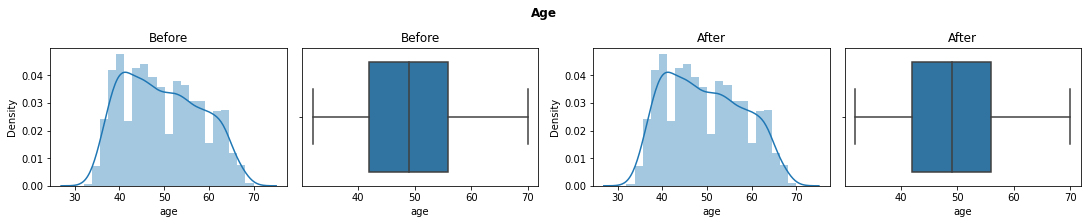

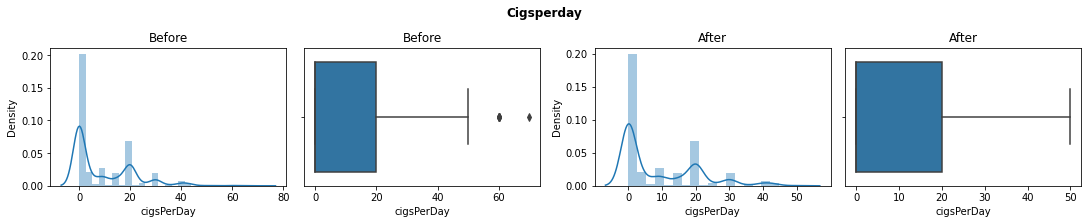

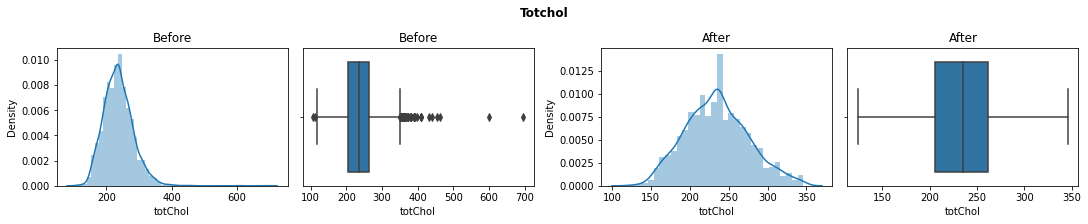

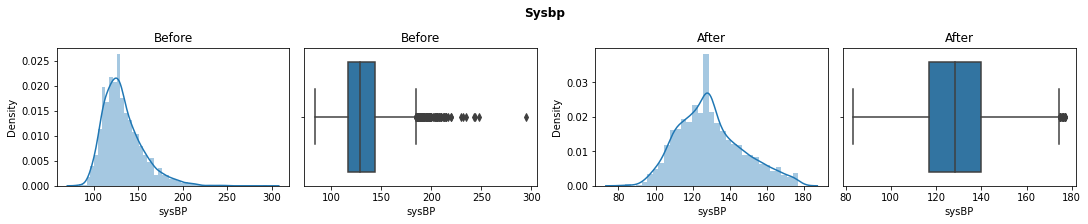

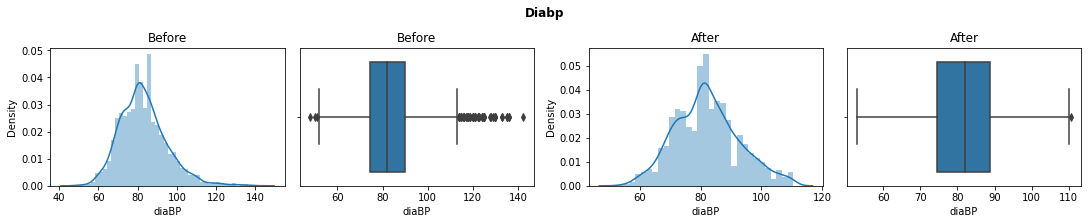

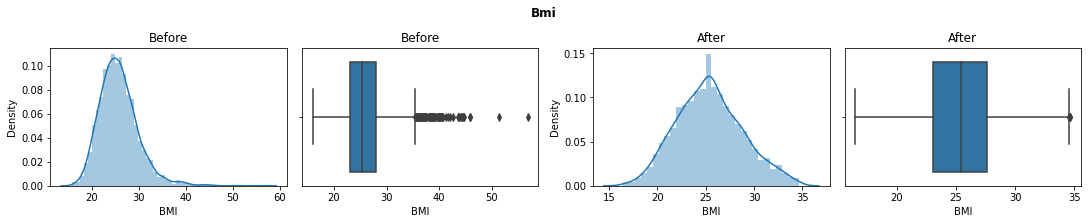

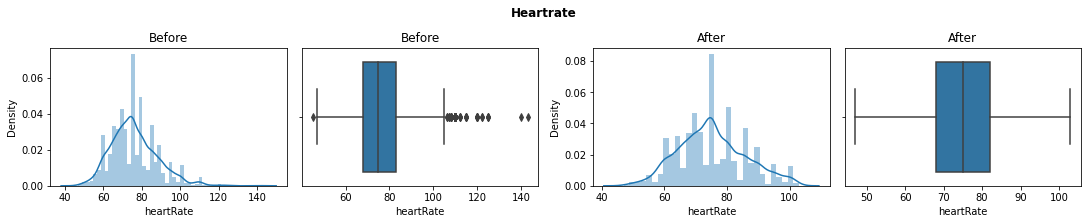

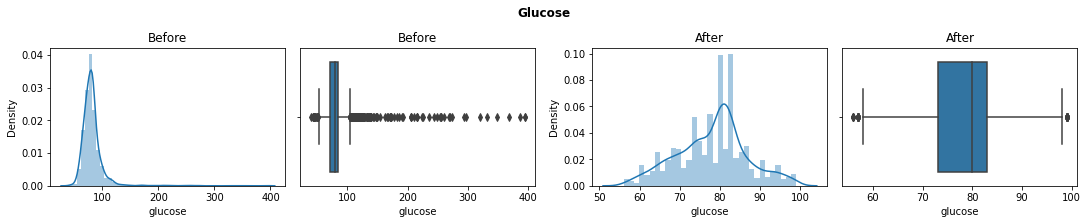

In [58]:
# Plotting Graphs Before treating outliers 
for col in num_feat:
  fig, ax =plt.subplots(1,4, constrained_layout=True)
  fig.set_size_inches(15, 3)
  sns.distplot(df1[col], ax=ax[0]).set(title="Before")
  sns.boxplot(df1[col], ax=ax[1]).set(title="Before")
  # After treating outliers
  sns.distplot(df2[col], ax=ax[2]).set(title="After")
  sns.boxplot(df2[col], ax=ax[3]).set(title="After")
  plt.suptitle(f'{col.title()}',weight='bold')
  fig.show()

## **Label Encoding :**

Label encoding is the process of turning labels into numeric form so that they may be read by machines. Machine learning algorithms can then make better decisions about how those labels should be used. In supervised learning, it is a crucial pre-processing step for the structured dataset.

In [29]:
# Defining a label encoder
encod = {'sex':{'M':1, 'F':0},'is_smoking':{'YES':1, 'NO': 0}}

# Label Encoding
df2 = df2.replace(encod)

In [30]:
# Checking the dataset for the implementation of the results
df2.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64.0,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,36.0,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,46.0,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,50.0,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,64.0,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


## **Patients at Risk :**

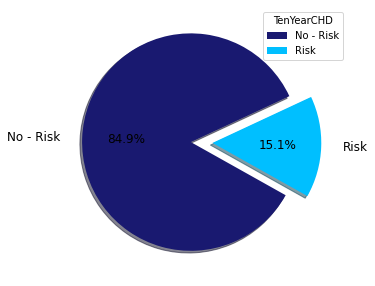

In [31]:
# Plotting pie chart to get the ten year risk
my_labels = ['No - Risk','Risk']
my_explode = [0.2,0]
my_colors = ['midnightblue','deepskyblue']
sizes = df2['TenYearCHD'].value_counts()
fig = plt.figure(1, figsize=(5,5))
plt.pie(sizes,labels = my_labels,explode = my_explode,colors = my_colors,labeldistance = 1.2,autopct='%1.1f%%',startangle = 25,shadow = True,pctdistance = 0.6,textprops={'fontsize': 12} )
plt.legend(title = 'TenYearCHD')
plt.show()

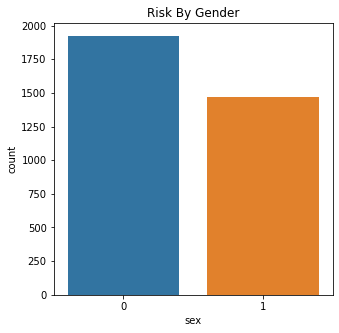

In [32]:
# Plotting pie chart to get the ten year risk
plt.figure(figsize=(5,5))
sns.countplot(df2['sex'])
plt.title('Risk By Gender')
plt.show()

**Assertion:** 

We can observe that 15.1% of participants in our dataset are at risk of cardiovascular disease, while 84.9% are not.

Text(0.5, 1.0, "Patient's Risk with Age")

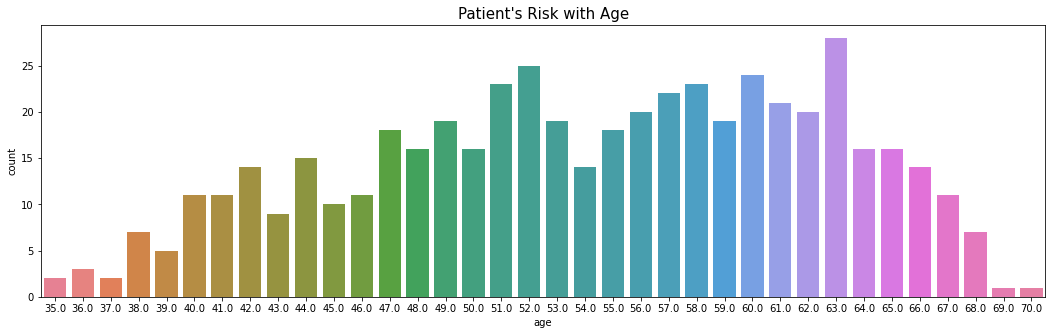

In [33]:
# Number risky patients with respect to age
age = df2[df2['TenYearCHD']==1]
fig, ax = plt.subplots(figsize = (18,5))
sns.countplot(x="age", data=age,palette='husl')
ax.set_title( "Patient's Risk with Age" , size =15)

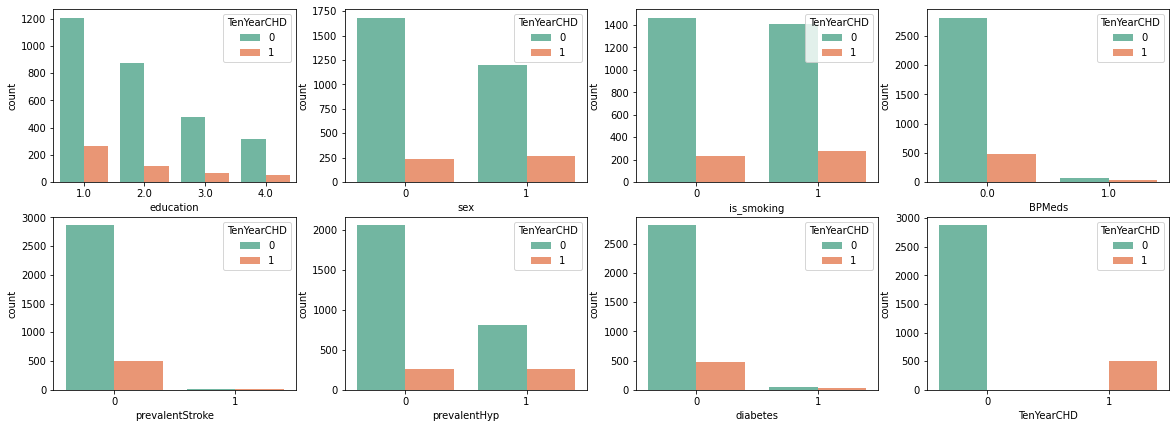

In [34]:
# Creating the Countplot for all the Categorical columns
plt.figure(figsize=(20,7))
for n,column in enumerate(df2[cat_feat].columns):
  feature = df2[column]
  ax=plt.subplot(2, 4, n+1)
  sns.countplot(x= feature,hue= 'TenYearCHD',data= df2, palette="Set2")

The graph for the dependent variable, as well as the categorical variables in the dataset, is plotted here.
We can conclude from here that,

*   People who are already suffering from Hypertension are more vulnerable.
*   It is not the same for persons who have previously suffered from a stroke. People who have never had a stroke are at a higher risk.
*   People, whether they smoke or not, are at risk.
*   It is shocking to see that people who have never received any medication are barely at risk. People who take blood pressure drugs are particularly vulnerable.
*   Males are at greater danger as compared to females.

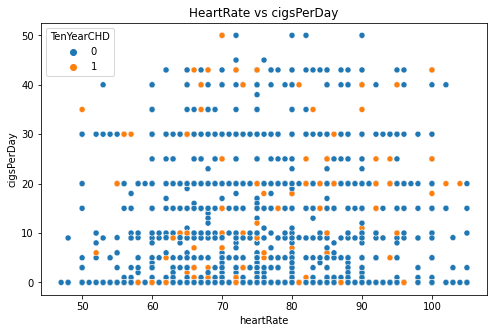

In [35]:
# Creating a Scatterplot with Multivariate Analysis
fig, ax = plt.subplots(figsize = (8,5))
sns.scatterplot(x="heartRate", y="cigsPerDay", hue="TenYearCHD", data=df2)
ax.set_title( "HeartRate vs cigsPerDay")
fig.savefig('HeartRate vs cigsPerDay')

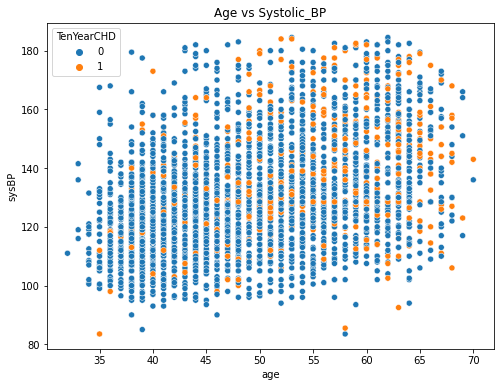

In [36]:
# Creating a Scatterplot with Multivariate Analysis
fig, ax = plt.subplots(figsize = (8,6))
sns.scatterplot(x="age", y="sysBP", hue="TenYearCHD", data=df2)
ax.set_title( "Age vs Systolic_BP")
plt.show()

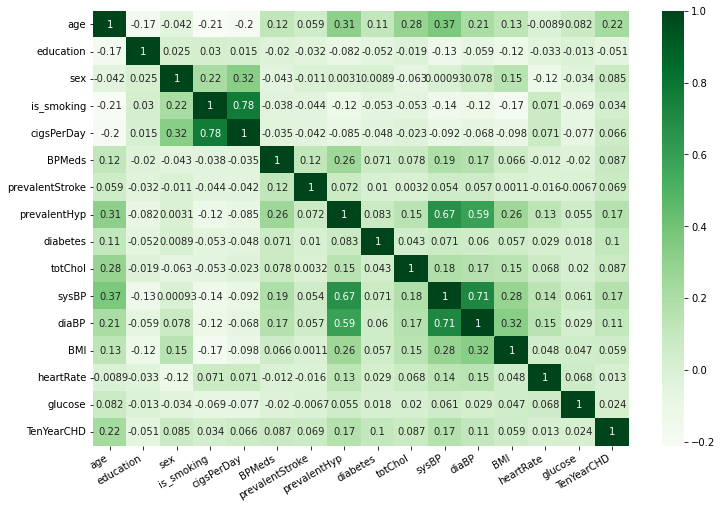

In [37]:
# Creating a Heatmap to see the correlation of the Columns with each other
plt.figure(figsize = (12,8))
pl = sns.heatmap(df2.corr(), annot = True, cmap='Greens')
pl.set_xticklabels(pl.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

**Assertion:**

Systolic blood pressure and hypertensive variables are associated, diastolic blood pressure and was hypertensive variables are correlated, glucose level and had diabetes variables are correlated, and diastolic blood pressure and systolic blood pressure are highly correlated.

# **Removing Multicolinearity :**

Multicollinearity should be examined before building models to ensure that no variables with high correlation are included.

In [38]:
# Defining a function to calculate Variance Inflation factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by='VIF',ascending=False).reset_index(drop=True))

The strength of the correlation between the independent variables is determined by VIF. It is predicted by regressing one variable against every other variable. An independent variable's VIF score shows how effectively the variable is explained by other independent variables.

In [39]:
# Checking VIF for each variable
ind_var = [i for i in df2.columns if i not in ['TenYearCHD']]
calc_vif(df2[ind_var])

,variables,VIF
0,sysBP,132.639335
1,diaBP,127.184097
2,BMI,58.895029
3,glucose,55.694635
4,heartRate,47.895845
5,age,42.769996
6,totChol,37.678636
7,is_smoking,5.080989
8,education,4.652023
9,cigsPerDay,4.337061


In [40]:
# Summer and Winter are highly correlated with temperature. Hence removing them
ind_var = [i for i in df2.columns if i not in ['TenYearCHD','sysBP','diaBP','glucose',
                                                            'BMI','totChol','heartRate','is_smoking']]
calc_vif(df2[ind_var])

,variables,VIF
0,age,5.385514
1,education,3.965761
2,sex,1.969319
3,cigsPerDay,1.747477
4,prevalentHyp,1.685379
5,BPMeds,1.120397
6,diabetes,1.044828
7,prevalentStroke,1.024822


In [41]:
# Adding the independent column to the dataframe
fdf = df2[ind_var + ['TenYearCHD']]
fdf

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,64.0,2.0,0,3.0,0.0,0,0,0,1
1,36.0,4.0,1,0.0,0.0,0,1,0,0
2,46.0,1.0,0,10.0,0.0,0,0,0,0
3,50.0,1.0,1,20.0,0.0,0,1,0,1
4,64.0,1.0,0,30.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3385,60.0,1.0,0,0.0,0.0,0,0,0,0
3386,46.0,1.0,0,0.0,0.0,0,0,0,0
3387,44.0,3.0,1,3.0,0.0,0,1,0,1
3388,60.0,1.0,1,0.0,0.0,0,1,0,0


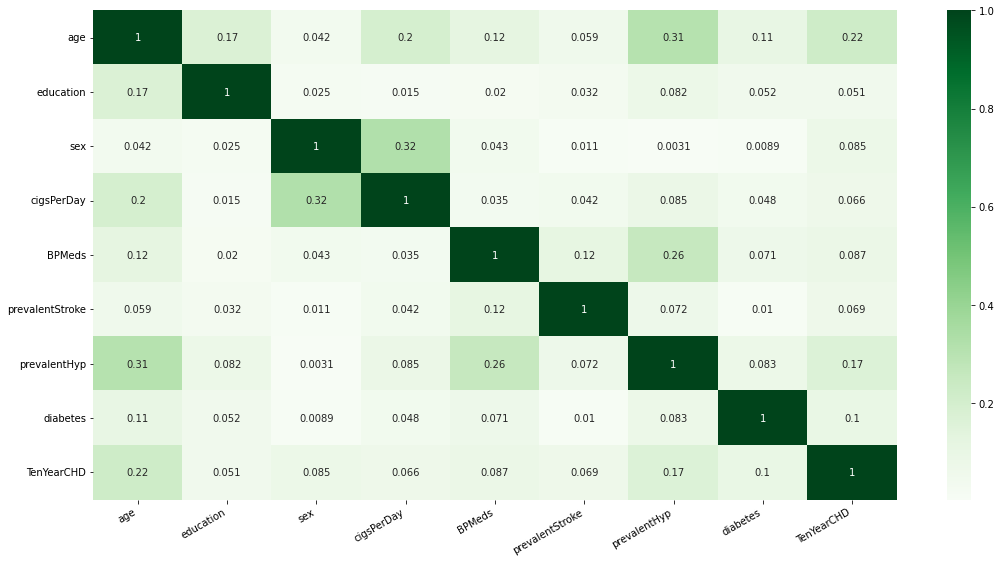

In [42]:
# Heatmap of the columns after removing highly collinear columns
plt.figure(figsize=(18,9))
pl=sns.heatmap(abs(fdf.corr()), annot=True, cmap='Greens')
pl.set_xticklabels(pl.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

## **Splitting :**

In [43]:
# assign values for independent variable
x = fdf.iloc[:,0:-1]
# assign values for dependent variable
y = fdf['TenYearCHD']

In [44]:
# Splitting the data into Train and Test with a test size of 20%
x_train, x_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 0) 
print(x_train.shape)
print(x_test.shape)

(2712, 8)
(678, 8)


# **SMOTE + Tomek Link :**

SMOTE is a technique that is followed by Tomek Link. SMOTE attempts to produce synthetic minority points from existing minority data points. After populating synthetic points, some points will overlap with the majority, and Tomek Link matches the minority with the opposing class and removes it. It separated the students. Then it is preferable to classify based on the model.

In [45]:
# Fitting SMOTETomek
sme = SMOTETomek(random_state=23)
x_smote, y_smote = sme.fit_resample(x_train, y_train)

## **Scaling :**

Feature scaling is a technique for standardizing the independent features present in data within a specific range. It is used during data pre-processing to deal with drastically changing magnitudes, values, or units. If feature scaling is not performed, a machine learning algorithm will tend to weight greater values as higher and consider smaller values as lower, regardless of the unit of measurement.

In [46]:
# Creating a Variable for the MinMaxScaler
scaler = MinMaxScaler()

In [47]:
# Sclaing a x variable data 
x_sm = scaler.fit_transform(x_smote)
x_smt = scaler.fit_transform(x_test)

In [48]:
x_sm

array([[0.57894737, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.13157895, 0.33333333, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.18421053, 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.31578947, 0.4643491 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.87069936, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.65789474, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ]])

# **Model building**

Machine learning models are algorithms that have been taught to detect patterns or trends in data and predict the outcome for new data.
We will be employing classification models in this project because we are dealing with a classification problem.

In [49]:
scoring = make_scorer(f1_score, pos_label=1)
ind_cols = [i for i in df.columns if i not in ['TenYearCHD']]

All these models have similar training and predicting processes, so writing code for each one of them separately makes it quite boring and lengthy. To solve this problem we can use functions. To implement this I will be using functions to execute the ML model training and also to evaluate the ML models.

In [50]:
# Defining a function to train the input model and print evaluation matrix
def apply_model(model, x_train, x_test, y_train, y_test):

  # Fitting model
  model.fit(x_train,y_train)

  # Feature importances
  try:
    try:
      imp = model.feature_importances_
      ind_col = ind_cols
    except:
      imp = np.abs(model.coef_[0])
      ind_col = ind_var
    indices = np.argsort(imp)
    indices = indices[::-1]
  except:
    pass

  # Plotting Evaluation Metrics for train and test dataset
  for x, y, label in ((x_train, y_train, 'Train-Set'),(x_test, y_test, "Test-Set")):

    # Getting required metrics
    pred = model.predict(x)
    pred_proba = model.predict_proba(x)[:,1]
    report = pd.DataFrame(classification_report(y_pred=pred, y_true=y, output_dict=True))
    False_Positive_Rate, True_Positive_Rate, thresholds = roc_curve(y, pred_proba)

    # Classification report
    plt.figure(figsize=(18,3))
    plt.subplot(1,3,1)
    sns.heatmap(report.iloc[:-1, :-1].T, annot=True, cmap='Blues')
    plt.title(f'{label} Report')

    # Confusion Matrix
    plt.subplot(1,3,2)
    sns.heatmap(confusion_matrix(y_true=y, y_pred=pred), annot=True, cmap='Blues')
    plt.title(f'{label} Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')
    
    # AUC_ROC Curve
    plt.subplot(1,3,3)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(False_Positive_Rate,True_Positive_Rate,label=f'AUC = {np.round(np.trapz(True_Positive_Rate,False_Positive_Rate),3)}')
    plt.legend(loc=4)
    plt.title(f'{label} AUC_ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()

  # Plotting Feature Importance
  try:
    plt.figure(figsize=(18,3))
    plt.stem(range(len(indices)),imp[indices])
    plt.xticks(range(len(indices)), [ind_col[i] for i in indices])
    plt.title('Feature Importance')
    plt.tight_layout()
  except:
    pass
  plt.show()

  return model

# **Model Implementation :**

# **Logistic Regression :**

A statistical analysis technique called logistic regression is used to forecast a data value based on previous data set observations. By examining the correlation between one or more already present independent variables, a logistic regression model forecasts a dependent data variable.

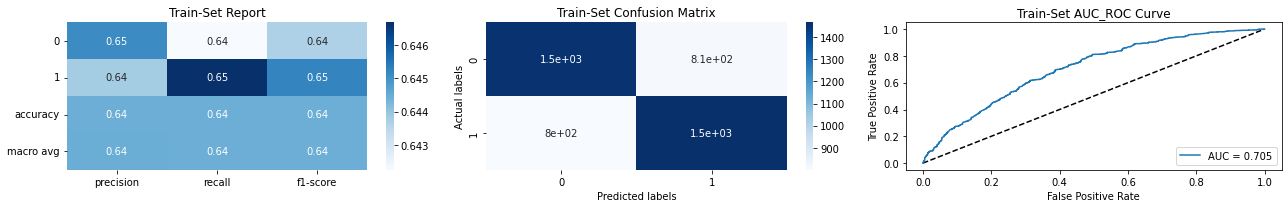

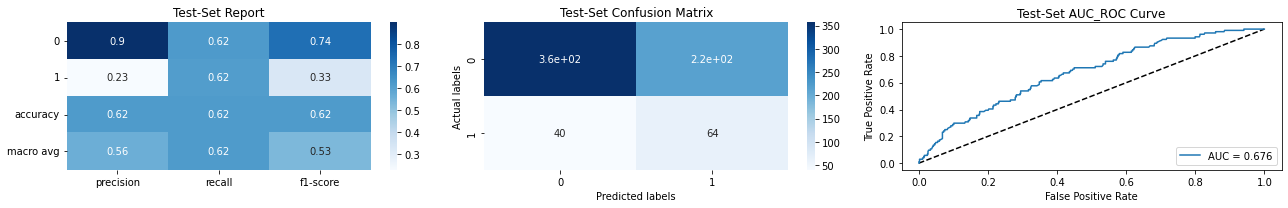

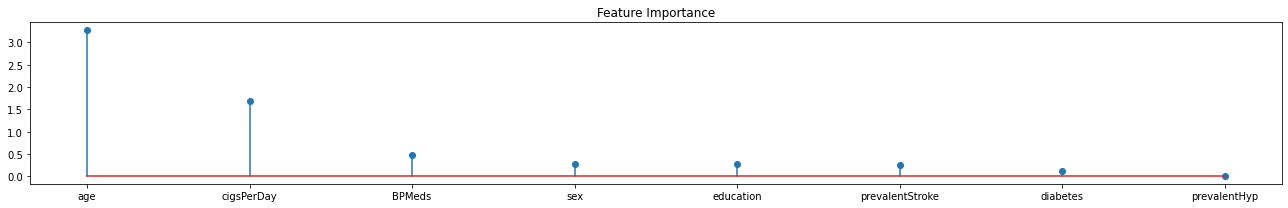

LogisticRegression(C=3.727593720314938, max_iter=10000)

In [51]:
# HyperParameter Grid
c_space = np.logspace(-5, 8, 15)
param_grid_lgr = {'C': c_space}
  
# Instantiating logistic regression classifier
logreg = LogisticRegression(fit_intercept=True, max_iter=10000)
  
# GridSearch to find the best parameters
logreg_cv = GridSearchCV(logreg, param_grid_lgr, cv = 5) 
logreg_cv.fit(x_sm, y_smote)
  
# Analysing the model with best set of parametes
apply_model(logreg_cv.best_estimator_, x_sm, x_smt, y_smote, y_test)

# **Support Vector Classifier**

One of the most well-liked supervised learning algorithms, Support Vector Machine, or SVM, is used to solve Classification and Regression problems. However, it is largely employed in Machine Learning Classification issues.
The SVM algorithm's objective is to establish the best line or decision boundary that can divide n-dimensional space into classes, allowing us to quickly classify fresh data points in the future. A hyperplane is the name given to this optimal decision boundary.

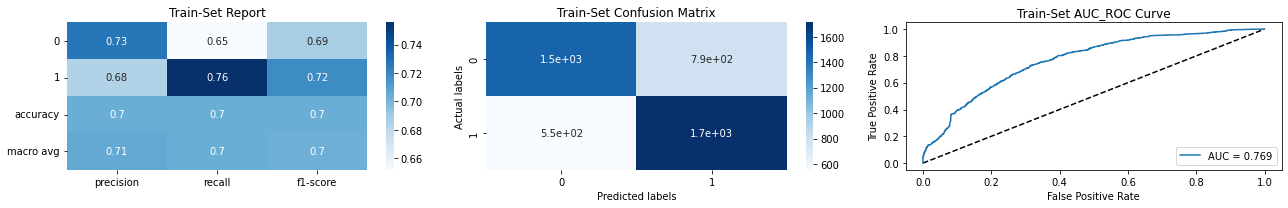

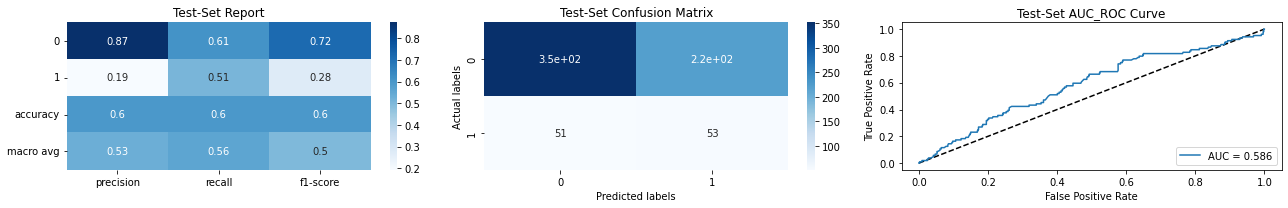

<Figure size 1296x216 with 0 Axes>

SVC(C=100, gamma=1, probability=True, random_state=0)

In [52]:
# SVM algorithm
sv = SVC(random_state= 0,probability=True)

# Hyperparameter Grid
param_grid_svc = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear','rbf']}

# GridSearch to find the best parameters
svc = GridSearchCV(sv, param_grid = param_grid_svc, scoring = scoring, cv=5)
svc.fit(x_sm, y_smote)

# Analysing the model with best set of parametes
apply_model(svc.best_estimator_, x_sm, x_smt, y_smote, y_test)

# **Random Forest Classifier**

An ensemble learning technique for classification, regression and other problems, random forests or random decision forests work by building a large number of decision trees during the training phase. The class that the majority of the trees chose is the output of the random forest for classification problems. The mean or average prediction of each individual tree is returned for regression tasks. Decision trees' propensity to overfit their training set is corrected by random decision forests. Although they typically outperform decision trees, gradient-boostedboosted trees are more accurate than random forests. However, their effectiveness may be impacted by data peculiarities.

Fitting 5 folds for each of 32 candidates, totalling 160 fits


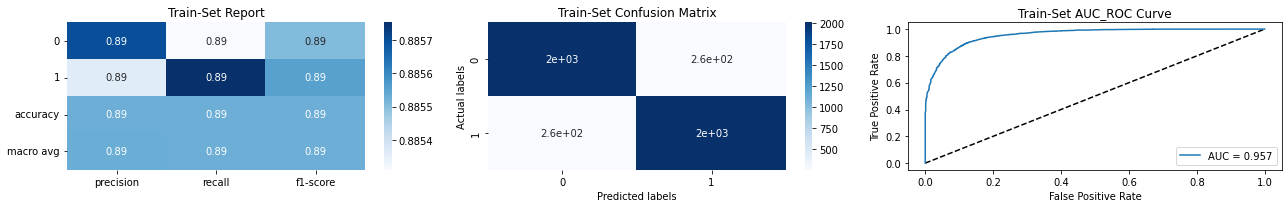

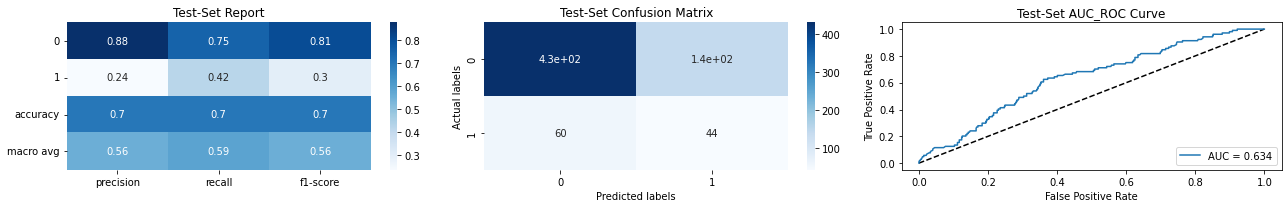

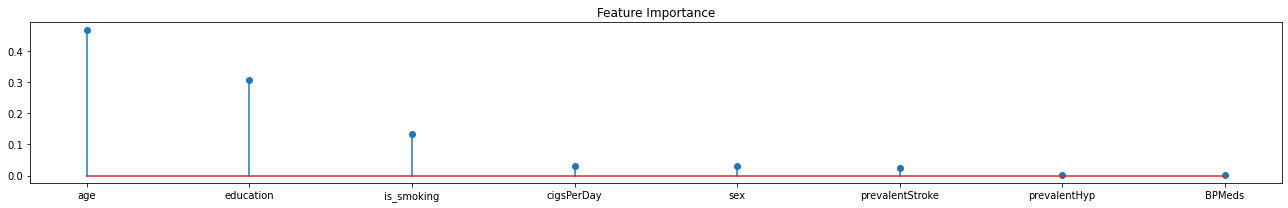

RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=3,
                       min_samples_split=10, random_state=2)

In [53]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=2)

# Hyperparameter Grid
param_grid_rf = {'max_depth': [80, 90],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 200]}

# GridSearch to find the best parameters
rfc=GridSearchCV(rf,param_grid_rf,verbose=1)
rfc.fit(x_sm,y_smote)

# Analysing the model with best set of parametes
apply_model(rfc.best_estimator_, x_sm, x_smt, y_smote, y_test)

# **Decision Tree classifier:**

A decision Tree is a supervised learning method that can be applied to classification and regression issues, however it is most frequently used to address classification issues. It is a tree-structured classifier, where internal nodes stand in for a dataset's features, branches for the decision-making process, and each leaf node for the classification result.

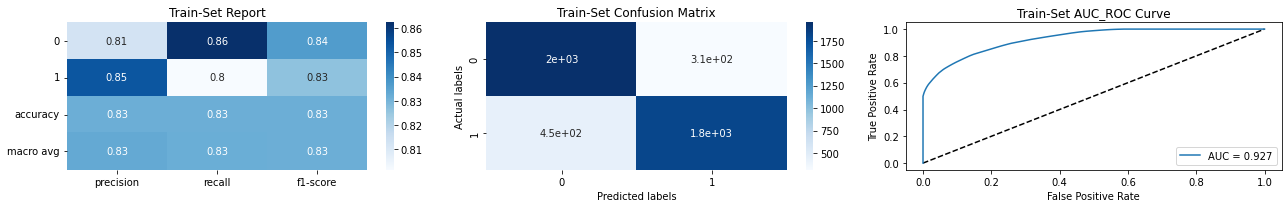

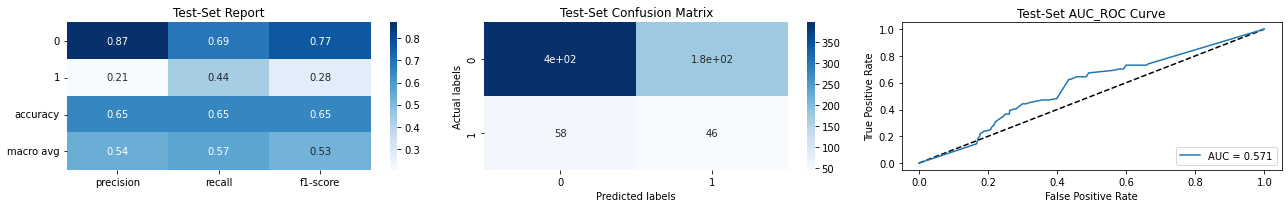

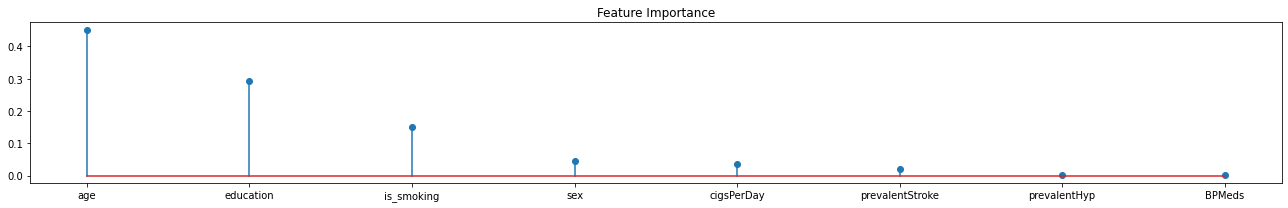

DecisionTreeClassifier(criterion='entropy', max_depth=90, max_features=3,
                       min_samples_leaf=3, min_samples_split=8)

In [54]:
# Decision tree Classifier Alogrithm
dtc = DecisionTreeClassifier()

# Hyperparameter Grid
param_grid_dtc = {'max_depth': [80, 90],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
              "criterion": ["gini", "entropy"]}

# GridSearch to find the best parameters
dtc_cv = GridSearchCV(dtc, param_grid_dtc, cv = 5)
dtc_cv.fit(x_sm, y_smote)

# Analysing the model with best set of parametes
apply_model(dtc_cv.best_estimator_, x_sm, x_smt, y_smote, y_test)

## **KNeighbour Classifier :**

The k-nearest neighbors' algorithm, sometimes referred to as KNN or k-NN, is a supervised learning classifier that employs proximity to producing classifications or predictions about the grouping of a single data point. Although it may be applied to classification or regression issues, it is commonly employed as a classification method since it relies on the idea that comparable points can be discovered close to one another.

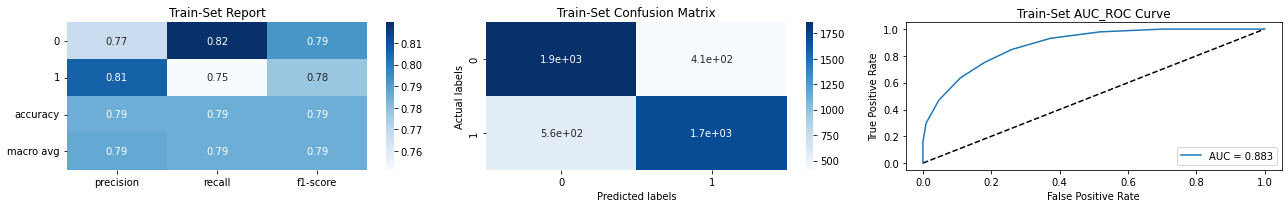

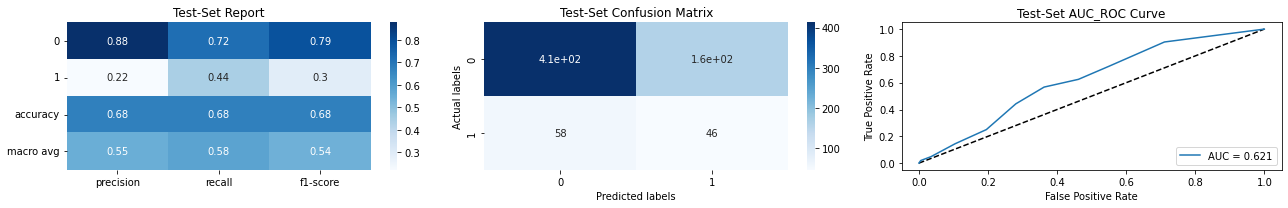

<Figure size 1296x216 with 0 Axes>

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

In [56]:
# Classifier
knc = KNeighborsClassifier()

# HYperparameter Grid
param_grid_knc = {'n_neighbors' : [5,7,9],
        'metric' : ['minkowski','euclidean','manhattan']}

# GridSearch to find the best parameters
knc_cv = GridSearchCV(knc, param_grid = param_grid_knc, scoring = scoring, cv=5)
knc_cv.fit(x_sm, y_smote)

# Analysing the model with best set of parametes
apply_model(knc_cv.best_estimator_, x_sm, x_smt, y_smote, y_test)

# **Conclusion :**

## **EDA insights:**

*   15.1% of the population in our dataset is at risk for cardiovascular disease, while 84.9% of the population is unaffected (TenYearCHD).

*   Cardiovascular disease is more likely to affect persons between the ages of 51 and 63.

*   We can't prove smoking causes heart disease since, as we can see from the count plot, there isn't much of a difference between these two groups, and our severe smoker, who smokes 70 cigarettes a day, doesn't have a ten-year risk.
*   Approximately 2800 patients are safe, while 500 patients who have not yet experienced a stroke are at risk.
*   We can see that there are more people without diabetes here, and 500 or so people without diabetes are at danger. And only a small percentage of persons with diabetes are at danger.

*   Most people with normal cholesterol levels range from 210 to 280, while those at risk have cholesterol levels between 215 and 285; this is a small but perfectly normal difference.


*   Most healthy individuals have a heart rate that ranges from 68 to 83, while those who are at risk have a heart rate that ranges from 68 to 84. which holds true for both risky and non-risky individuals.


*   The average person smokes between 1 and 10 cigarettes per day, with a heart rate between 60 and 100.



## **ML Model Results :**



*   The substantial class imbalance in the training set was addressed by the addition of synthetic data points, which changed the data distribution in the train and test sets. As a result, the large class imbalance in the train set and the mismatch in the data distribution between the train and test sets are to blame for the high performance of the train set models rather than overfitting.

*   The testing set's ROCAUC score for SVC is 0.60.
*   The testing set's ROCAUC score for logistic regression is 0.62.
*   The testing set's ROCAUC score for DTC is 0.66.
*   The testing set's ROCAUC score for KNN is 0.68.
*   The testing set's ROCAUC score for Random Forest Classifier is 0.72.
*   For each model, a classification report and a confusion matrix have been plotted.






